In [47]:
# example of calculating the frechet inception distance in Keras
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from skimage.transform import resize

In [48]:
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
	# calculate activations
	act1 = model.predict(images1)
	act2 = model.predict(images2)
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

In [49]:
import imageio
#Load in images
img1 = imageio.imread('reals1.png')
img2 = imageio.imread('fakes007440.png')

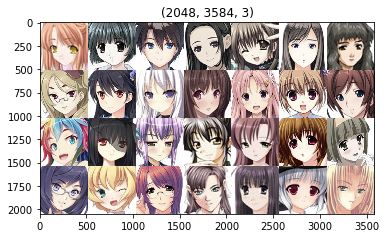

In [50]:
import matplotlib.pyplot as plt
plt.imshow(img1)
plt.title(img1.shape)
plt.show()

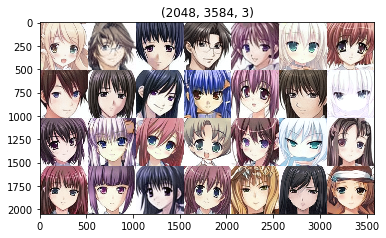

In [51]:
plt.imshow(img2)
plt.title(img2.shape)
plt.show()

In [52]:
from PIL import Image
image_shape = (128,128,3)
img12 = Image.open('reals1.png')
img12 = img12.resize(image_shape[:-1])
img12 = numpy.array(img12)

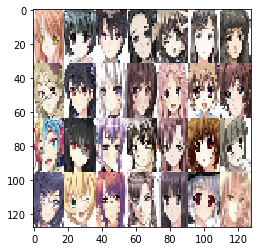

In [53]:
plt.imshow(img12)

In [54]:
from PIL import Image
image_shape = (128,128,3)
img13 = Image.open('fakes007440.png')
img13 = img13.resize(image_shape[:-1])
img13 = numpy.array(img13)

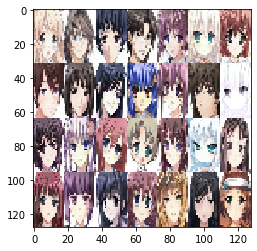

In [55]:
plt.imshow(img13)

In [56]:
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# define the fake and real image collection 
images1 = img12
images2 = img13
print('Prepared', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)

Prepared (128, 128, 3) (128, 128, 3)
Scaled (128, 299, 299, 3) (128, 299, 299, 3)


In [57]:
# fid between images1 and images1
fid = calculate_fid(model, images1, images1)
print('FID (same): %.3f' % fid)
# fid between images1 and images2
fid = calculate_fid(model, images1, images2)
print('FID (different): %.3f' % fid)

FID (same): -0.000
FID (different): 7.314
